In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prices = pd.read_csv("data.csv", parse_dates=["date"])
prices.set_index("date", inplace=True)

# Make the plot bigger
plt.rcParams["figure.figsize"] = (10, 4)

returns = prices.pct_change().dropna(how="all")
# print(returns)

log_return = np.log(prices / prices.shift(1)).dropna(how="all")
# print(log_return)

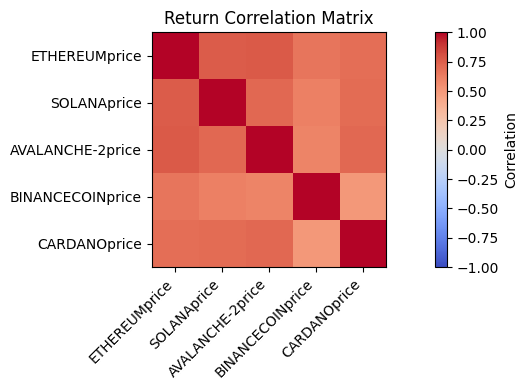

In [4]:
# A correlation matrix of the 5 tokens

corr_matrix = returns.corr()
# print(corr)

# A Heatmap
# Use a divergent colormap like 'RdBu_r' or 'coolwarm' to represent the correlation values
# 'RdBu_r': Red to Blue, reversed (Blue for negative, White for zero, Red for positive)
# 'coolwarm': Blue to Red (Blue for negative, White for zero, Red for positive)
# To get the desired color scheme (deep green for 1, light for 0, deep blue for -1), we can use 'seismic' or a custom colormap.
# Let's use 'seismic' which goes from blue to white to red, then reverse it for blue to green.
# However, 'seismic' is blue-white-red. To get blue-light-green, we might need a custom colormap or another option.
# Let's try 'GnBu' (Green to Blue) and reverse it. This won't give us the -1 to 1 range with a center at 0.
# A better approach is to use a divergent colormap and potentially customize it.

# Using 'coolwarm' which is blue-white-red, let's see if we can adjust it or find a better one.
# 'seismic' is blue-white-red.
# 'bwr' is blue-white-red.

# Let's try creating a custom colormap or using a suitable existing one.
# The user wants: -1 (deep blue), 0 (light color), 1 (deep green).
# 'viridis' and 'plasma' are sequential.
# 'coolwarm' is blue-white-red.
# 'bwr' is blue-white-red.
# 'seismic' is blue-white-red.

# We can use matplotlib.colors.LinearSegmentedColormap to create a custom colormap.
from matplotlib.colors import LinearSegmentedColormap

colors = ["darkblue", "lightblue", "lightgreen", "darkgreen"]
nodes = [0.0, 0.5, 0.75, 1.0] # These nodes need adjustment based on the data range and desired color transitions

# Let's use a simpler approach with an existing divergent colormap and adjust the center if needed.
# 'coolwarm' is a good candidate for divergent data around 0.
# Let's use 'coolwarm' and see how it looks, then consider customization if necessary.

# Recreate the figure and axes to apply the new colormap
fig, ax = plt.subplots()

# Use 'coolwarm' colormap, centered at 0
cax = ax.imshow(corr_matrix.values, vmin=-1, vmax=1, cmap='coolwarm')

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

ax.set_xticklabels(corr_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(corr_matrix.columns)

ax.set_title("Return Correlation Matrix")
fig.colorbar(cax, ax=ax, label="Correlation")

plt.tight_layout()
plt.show()

In [ ]:
## Correlation matrix on 30 days rolling window

WINDOW = 30
rolling_corr = returns.rolling(window=WINDOW).corr()
# print(rolling_corr)


## Compute and plot the rolling correlation of ETH and other tokens

eth_col = [col for col in rolling_corr.columns if col.startswith("ETH")]
eth_corr = rolling_corr.loc[eth_col, eth_col

